## Data Preparation and Processing

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

Example numerical data:
```python
  * An exerimental drug was tested on individuals from ages 13 to 100 in a trial.
  * the trial has 2100 participants. half are under 65y/o, half were 65y/o or older
  * Around 95% of patients or older expereienced side effects.
  * around 95% of patients under 65 exeprienced no side effects.
```

#### Generating data to match the above scenario

In [3]:
## 1 indicates being positive with side effects
## 0 no- side effects

for i in range (50):
    # the ~5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range (1000):
    # the ~95% of younger individuals who did not experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The 5% of older individuals who did experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)
    

#### transform the lists (train_labels, train_samples) into NumpyArrays

In [4]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

# shuffle 

train_labels, train_samples = shuffle(train_labels, train_samples)

In [5]:
# scaling the sample ages to be 0 -> 1
# altenatively divide by 100 or suitable scale divisor
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples= scaler.fit_transform(train_samples.reshape(-1,1)) # resahpe() expects 2d data

In [6]:
## result of the scaling vs actuals ages [COMPREHENSION]
# [(train_samples[i],  " scaled to => ", scaled_train_samples[i]) for i in range(6)]

## Simple Sequential Model (tf.keras)  

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Activation, Dense
# For trainig not for during the BUILDING process
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [47]:
# NO GPU
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print("Available GPU: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], true)

Available GPU:  0


In [48]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation= "softmax")
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(x=scaled_train_samples, y=train_labels , batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
210/210 - 1s - loss: 0.6900 - accuracy: 0.4910 - 1s/epoch - 6ms/step
Epoch 2/30
210/210 - 0s - loss: 0.6630 - accuracy: 0.7967 - 414ms/epoch - 2ms/step
Epoch 3/30
210/210 - 0s - loss: 0.6340 - accuracy: 0.8424 - 414ms/epoch - 2ms/step
Epoch 4/30
210/210 - 0s - loss: 0.6036 - accuracy: 0.8424 - 409ms/epoch - 2ms/step
Epoch 5/30
210/210 - 0s - loss: 0.5726 - accuracy: 0.8481 - 410ms/epoch - 2ms/step
Epoch 6/30
210/210 - 0s - loss: 0.5415 - accuracy: 0.8562 - 405ms/epoch - 2ms/step
Epoch 7/30
210/210 - 0s - loss: 0.5108 - accuracy: 0.8690 - 407ms/epoch - 2ms/step
Epoch 8/30
210/210 - 0s - loss: 0.4813 - accuracy: 0.8738 - 406ms/epoch - 2ms/step
Epoch 9/30
210/210 - 0s - loss: 0.4533 - accuracy: 0.8881 - 403ms/epoch - 2ms/step
Epoch 10/30
210/210 - 0s - loss: 0.4278 - accuracy: 0.8876 - 402ms/epoch - 2ms/step
Epoch 11/30
210/210 - 0s - loss: 0.4049 - accuracy: 0.9038 - 443ms/epoch - 2ms/step
Epoch 12/30
210/210 - 0s - loss: 0.3849 - accuracy: 0.8995 - 396ms/epoch - 2ms/step
Epoc

## Creating a validation set

Example 1:
```    model.fit(
        x=train_samples, 
        y=train_labels,
        
        validation_data= validation_set,
        
        batch_size=10, 
        epochs=30, 
        shuffle=True, 
        verbose=2)
```

Example 2:
```    model.fit(
        x=train_samples, 
        y=train_labels,
        
        validation_split=0.1, 
        
        batch_size=10, 
        epochs=30, 
        shuffle=True, 
        verbose=2)

---- NB: The validation_split happens before the training set is SHUFFLED
            thus, 10% of the data is reserved for validation before training starts
```

### Overfitting concerns

Overfitting -> model crams input-data ==> not able to generalize

notici=eable difference between [loss, accuracy] and [val_loss, val_accuracy] preferable generalization

if validation_accuracy is low(high train accuracy), then overfitting is happening
<<>>

In [13]:
# model.fit(x=train_samples, y=train_labels, validation_split=0.1 , batch_size=10, epochs=30, shuffle=True, verbose=2)

## Check inference ability 
by using a TEST_DATA set to predict on new data(production)

total_data = 80% training + 10% validation + 10% inference_testing 

test_data could even be for a different prediction_ case

In [14]:
test_samples = []
test_labels = []

In [15]:
## 1 indicates being positive with side effects
## 0 no- side effects

for i in range (10):
    # the ~5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range (200):
    # the ~95% of younger individuals who did not experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The 5% of older individuals who did experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)
    

In [16]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

# shuffle 

test_labels, test_samples = shuffle(test_labels, test_samples)

In [17]:
test_samples[:50]

array([18, 80, 30, 35, 52, 44, 30, 32, 86, 56, 39, 48, 94, 99, 82, 29, 51,
       68, 70, 64, 73, 55, 68, 40, 42, 86, 94, 55, 30, 44, 80, 44, 99, 20,
       77, 70, 92, 17, 62, 15, 49, 28, 16, 20, 80, 70, 70, 84, 44, 76])

In [18]:
# scaling the sample ages to be 0 -> 1
# altenatively divide by 100 or suitable scale divisor
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples= scaler.fit_transform(test_samples.reshape(-1,1)) # resahpe() expects 2d data

In [19]:
scaled_test_samples[:5]

array([[0.05747126],
       [0.77011494],
       [0.1954023 ],
       [0.25287356],
       [0.44827586]])

## Predictions

In [20]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=2)

42/42 - 0s - 283ms/epoch - 7ms/step


In [45]:
# [0 => no side effects, 1 = some side effects]

predictions[:20]

array([[0.97852826, 0.02147169],
       [0.10780372, 0.8921963 ],
       [0.97772366, 0.02227634],
       [0.9644638 , 0.03553616],
       [0.7781903 , 0.22180966],
       [0.9018467 , 0.09815332],
       [0.97772366, 0.02227634],
       [0.97448915, 0.02551073],
       [0.06572314, 0.9342768 ],
       [0.68433595, 0.31566405],
       [0.9437279 , 0.05627204],
       [0.85024613, 0.14975385],
       [0.04652261, 0.9534773 ],
       [0.03736872, 0.96263134],
       [0.0869066 , 0.9130934 ],
       [0.97779185, 0.02220818],
       [0.79826677, 0.20173322],
       [0.33841327, 0.66158664],
       [0.28678226, 0.71321774],
       [0.45289212, 0.5471079 ]], dtype=float32)

In [44]:
rounded_preds = np.argmax(predictions, axis=-1)
rounded_preds[:20]

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1])

## Confusion Matrix

In [23]:
# %matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [24]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_preds)

In [25]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues ):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title= title
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation= 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm= cm.astype('float')/ cm.sum(axis=1)[:, np,newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrx, with out normalization")
        
    print(cm)
    
    thresh = cm.max()/2
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j], horizontalalignment="center", color='white' if cm[i,j]> thresh else "black")
        
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

Confusion matrx, with out normalization
[[195  15]
 [  9 201]]


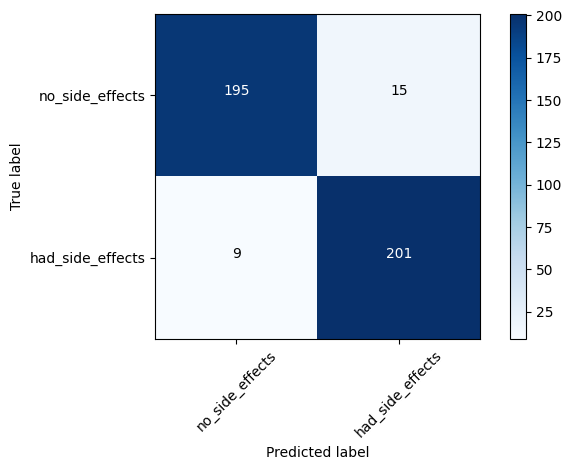

In [26]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

## Save and Load Model

### 1. model.save()

In [27]:
import os.path as path

# model.save('models/medical_trial_model_2018.h5')
if path.isfile('models/medical_trial_model_2018.h5') is False:
    model.save('models/medical_trial_model_2018.h5')
    



This save functions saves:

    The architecture of the model, allowing to re-create the model.
    The weights of the model.
    The training configuration (loss, optimizer).
    The state of the optimizer, allowing to resume training exactly where you left off.



In [28]:
#  from tensorflow.keras import load_model # Already imported above
new_model= load_model('models/medical_trial_model_2018.h5')

In [29]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [43]:
# print(new_model.get_weights())

In [31]:
new_model.optimizer

In [41]:
#  list all the methods available for a model

# dir(new_model)

### 2. model.to_json()

Saves the architecture of a model, and not its weights or its training configuration, you can use the following function to save the architecture only.

In [33]:
# save as JSON
json_string = model.to_json()


# save as YAML
# yaml_string = model.to_yaml()

In [34]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [35]:
# model reconstruction from JSON:
from keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)



In [36]:
model_architecture.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## 3. model.save_weights

To save the weights of a model, NB: weights only

In [37]:
model.save_weights('my_model_weights.h5')


In [38]:
model2 = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [39]:
model2.load_weights('my_model_weights.h5')